## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [1]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=44401678b8ac64bd0dc3ff69cb7f6f4bf286699d2093afdea464278b5c131297
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Minisom library and module is used for performing Self Organizing Maps 
from minisom import MiniSom 

In [4]:
# Loading Data 
data = pd.read_csv('Credit_Card_Applications.csv') 

# X  
data 

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
# Shape of the data: 
""" 
    Write Code to display shape of data
"""

##fill
data.shape

(690, 16)

In [6]:
# Info of the data: 
""" 
    Write Code to display information of data using inbuilt info function
"""

#fill
data.info

<bound method DataFrame.info of      CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A1

In [7]:
# Defining X variables for the input of SOM 
X = data.iloc[:, 1:14].values 
y = data.iloc[:, -1].values 

# X variables: 
""" 
    Convert X variable into a pandas DataFrame
"""

#fill
X_df = pd.DataFrame(X, columns=data.columns[1:14]) 
print(X_df.head())

    A1     A2     A3   A4   A5   A6     A7   A8   A9   A10  A11  A12    A13
0  1.0  22.08  11.46  2.0  4.0  4.0  1.585  0.0  0.0   0.0  1.0  2.0  100.0
1  0.0  22.67   7.00  2.0  8.0  4.0  0.165  0.0  0.0   0.0  0.0  2.0  160.0
2  0.0  29.58   1.75  1.0  4.0  4.0  1.250  0.0  0.0   0.0  1.0  2.0  280.0
3  0.0  21.67  11.50  1.0  5.0  3.0  0.000  1.0  1.0  11.0  1.0  2.0    0.0
4  1.0  20.17   8.17  2.0  6.0  4.0  1.960  1.0  1.0  14.0  0.0  2.0   60.0


In [9]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 
""" 
    apply fit_transform using the created MinMaxScaler sc on variable X 
"""
X_sc = sc.fit_transform(X)
X_df = pd.DataFrame(X_sc , columns = data.columns[1:14])
X_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03


In [10]:
# Set the hyper parameters 
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

# define SOM: 
""" 
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
#fill
som = MiniSom(
    x = som_grid_rows,
    y = som_grid_columns,
    sigma = sigma,
    input_len = 13,
    learning_rate = learning_rate
)

In [25]:
# Initializing the weights 
som.random_weights_init(X) 

# Training 
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
#fill
som.train_random(data=X, num_iteration=iterations)

# Returns the distance map from the weights: 
som.distance_map() 

array([[1.        , 0.62847305, 0.22040891, 0.16646881, 0.25602051,
        0.20944995, 0.07432763, 0.03458788, 0.02895136, 0.01773741],
       [0.75441017, 0.81068515, 0.29004902, 0.23642246, 0.3572463 ,
        0.29777037, 0.11538226, 0.0756627 , 0.04786371, 0.03150513],
       [0.33160016, 0.38104714, 0.21217929, 0.21073154, 0.30660417,
        0.24275998, 0.12423535, 0.09838335, 0.07176362, 0.04743579],
       [0.11824512, 0.16067395, 0.12757863, 0.17335762, 0.24786361,
        0.20207273, 0.1024397 , 0.09065293, 0.08270241, 0.05538888],
       [0.06401697, 0.09231199, 0.09938769, 0.14075839, 0.19175831,
        0.16157833, 0.1077195 , 0.08619375, 0.06008683, 0.0378244 ],
       [0.05411342, 0.08039255, 0.08976797, 0.1263806 , 0.14245156,
        0.11973246, 0.09788167, 0.07562223, 0.05063853, 0.02867987],
       [0.04335365, 0.06744987, 0.081886  , 0.10532175, 0.09407011,
        0.07386733, 0.07394458, 0.06348245, 0.05749662, 0.03750086],
       [0.02622278, 0.05690302, 0.0706342

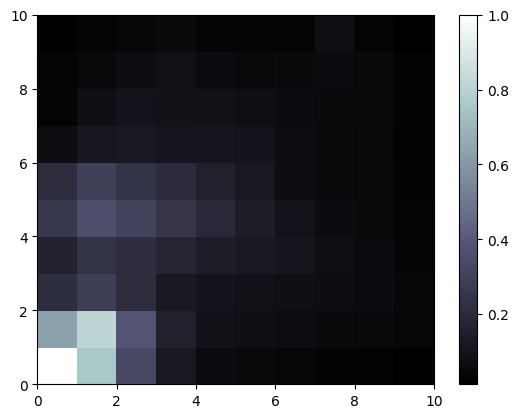

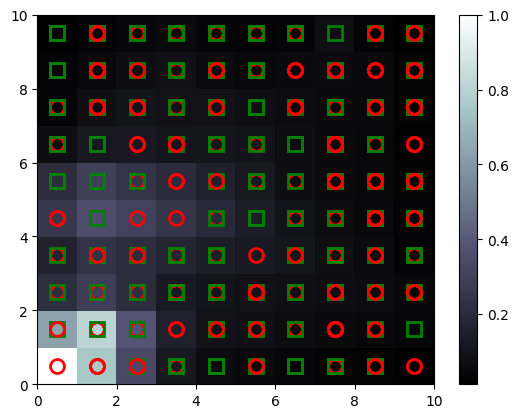

In [26]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T)       # Distance map as background 
colorbar() 
show() 
bone() 
pcolor(som.distance_map().T) 
colorbar() #gives legend 

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [27]:
"""
    Write code to store som win_map into a variable names mappings
"""

#fill
mappings = som.win_map(X)

mappings 
mappings.keys() 

"""
    Write code to find the length of mapping.keys()
"""

#fill
len(mappings.keys())

100

In [28]:
mappings[(9,8)] 
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0) 
frauds 

array([[0.0000e+00, 2.4750e+01, 3.0000e+00, 2.0000e+00, 1.1000e+01,
        8.0000e+00, 1.8350e+00, 1.0000e+00, 1.0000e+00, 1.9000e+01,
        0.0000e+00, 2.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.0500e+01, 6.5000e+00, 2.0000e+00, 8.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 7.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00],
       [1.0000e+00, 3.4750e+01, 1.5000e+01, 2.0000e+00, 1.2000e+01,
        7.0000e+00, 5.3750e+00, 1.0000e+00, 1.0000e+00, 9.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.8920e+01, 1.5000e+01, 2.0000e+00, 8.0000e+00,
        8.0000e+00, 5.3350e+00, 1.0000e+00, 1.0000e+00, 1.1000e+01,
        0.0000e+00, 2.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.5420e+01, 1.2000e+01, 2.0000e+00, 1.1000e+01,
        8.0000e+00, 1.4000e+01, 1.0000e+00, 1.0000e+00, 8.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00],
       [1.0000e+00, 3.4170e+01, 9.1700e+00, 2.0000e+00, 8.0000e+00,
        4.0000e+00, 4.5000e

In [29]:
# the list of customers who are frauds: 
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""

#fill
frauds1 = sc.inverse_transform(frauds)
new_df = pd.DataFrame(frauds1) 
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1659.625,84.0,5.0,144.0,65.0,52.2975,1.0,1.0,1273.0,0.0,5.0,0.0
1,0.0,2042.000,182.0,5.0,105.0,41.0,114.0000,1.0,1.0,469.0,1.0,5.0,0.0
2,1.0,2324.625,420.0,5.0,157.0,57.0,153.1875,1.0,1.0,603.0,1.0,5.0,0.0
3,1.0,1936.930,420.0,5.0,105.0,65.0,152.0475,1.0,1.0,737.0,0.0,5.0,0.0
4,0.0,2369.180,336.0,5.0,144.0,65.0,399.0000,1.0,1.0,536.0,0.0,5.0,0.0
